<h1>Pipelines</h1>

In this notebook, i will create a pipeline (using scikit-learn library), to prepare the data, and create a random forest classifier, to predict the income of an income estimation sample dataset.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from ipynb.fs.full.funPyModeling import status, num_vars, cat_vars

In [7]:
set_config(display='diagram')

<h3>Data Loading</h3>

In [8]:
data = pd.read_csv("data/income_estimation_sample2.csv", sep=';', index_col=0)

<h3>Dataset Status</h3>

In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,hours_per_week,0,0.000000,0,0.0,77,int64
1,age,7,0.001433,0,0.0,69,float64
2,education,5,0.001024,0,0.0,16,object
3,income,0,0.000000,0,0.0,2,object


In this dataset there are 2 numerical variables and 2 categorical variables. Also, there are 7 NaNs in 'age' and 5 NaNs in 'education'

<h3>Test set and training set separation</h3>

In [10]:
x_data = data.drop(['income'], axis=1)
y_data = data['income']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

<h3>Pipeline Creation (Data Preparation and Model Creation)</h3>

In [12]:
# Numerical and categorical pipelines
num_transformer = Pipeline(
    steps=[('num_imputer', SimpleImputer(strategy='median'))])

cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
          ('ohe', OneHotEncoder())])

# Merge of the pipelines
all_transformer = ColumnTransformer(
    transformers=[
        ('num_t', num_transformer, num_vars(x_train)),
        ('cat_t', cat_transformer, cat_vars(x_train))])

Random forest classifier addition to the pipeline.

In [13]:
pipe_rf = Pipeline(steps=[('all_transformer', all_transformer),
                          ('model_rf', RandomForestClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 10))])

Data fitting.

In [14]:
pipe_rf.fit(x_train, y_train)

Pipeline(steps=[('all_transformer',
                 ColumnTransformer(transformers=[('num_t',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['hours_per_week', 'age'], dtype='object')),
                                                 ('cat_t',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['education'], dtype='object'))])),
                ('model_rf',
                 RandomForestClassifier(max_depth=4, min_samples_leaf=10,
                                        min_samples_split=20))])

<h3>Predictions for training set and test set</h3>

In [15]:
pipe_rf.predict_proba(x_train)[0:10]

array([[0.65016799, 0.34983201],
       [0.60715942, 0.39284058],
       [0.91516522, 0.08483478],
       [0.77246643, 0.22753357],
       [0.65864753, 0.34135247],
       [0.80633793, 0.19366207],
       [0.91941144, 0.08058856],
       [0.68384493, 0.31615507],
       [0.65710408, 0.34289592],
       [0.93314588, 0.06685412]])

In [16]:
pipe_rf.predict_proba(x_test)[0:10]

array([[0.71029518, 0.28970482],
       [0.77246643, 0.22753357],
       [0.76817943, 0.23182057],
       [0.64803927, 0.35196073],
       [0.77246643, 0.22753357],
       [0.89466488, 0.10533512],
       [0.81511716, 0.18488284],
       [0.65687898, 0.34312102],
       [0.53445684, 0.46554316],
       [0.58251936, 0.41748064]])

<h3>ROC graphic</h3>

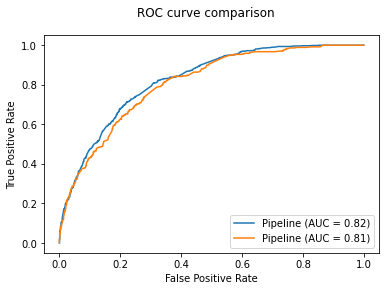

In [17]:
svc_disp = plot_roc_curve(pipe_rf, x_train, y_train)
rfc_disp = plot_roc_curve(pipe_rf, x_test, y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

plt.show()

The AUC value is similar for the test set and for the training set, also, both values are bigger than 0.70, so, the model has a great performance.